# Off-Specular simulation

Off-specular simulation is a technique developed to study roughness or micromagnetism at micrometric scale \[1\]. For the moment BornAgain has only the limited support for off-specular simulation. User feedback is required to continue development.

![Off-Specular Geometry](img/geometry.png)
*Off-specular Geometry \[1\]*

The term *off-specular scattering* is typically ised for experiment geometries where $\mathbf{q}$ is not strictly perpendicular to the sample surface. Following features can be encountered in off-specular scattering experiment: Yoneda peaks, Bragg sheets, diffuse scattering, magnetic spin-flip scattering, and correlated and uncorrelated roughness \[2\].

![Off-Specular simulation](img/offspec.png)

## Create an off-specular simulation in BornAgain GUI

1. Start a new project `Welcome view`->`New project`
2. Go to the `Instrument view` and add an **Offspec** instrument.
3. Set the instrument parameters as follows.
    ![Offspec instrument](img/offspec_instr.png)
4. Switch to the `Sample view`. Create a sample as shown below:
    ![Offspec sample](img/offspec_sample.png)
    Create 4 layers (from bottom to top): 
    - Si substrate, $\delta=7.6\cdot 10^{-6}$, $\beta=1.7\cdot 10^{-7}$. Assign roughness with `Sigma` 0.46 nm, `Hurst` parameter 0.5 and `CorrelationLength` 100 nm.
    - Nb layer of thickness 5.8 nm, $\delta=2.4\cdot 10^{-5}$, $\beta=1.5\cdot 10^{-6}$. No roughness.
    - Si layer of thickness 3 nm. No roughness.
    - Air layer.
5. Switch to `Simulation view`. Set option `Include specular peak` to **Yes**.
    ![Offspec simulation](img/offspec_simwin.png)
    
Run simulation. Vary the intensity scale. You should be able to see the specular line and Yonedas. To see the Bragg sheets we need to increase a number of [Si/Nb] double-layers to at least 10. Let's do it in Python.


## Off-specular simulation with BornAgain Python API

Go to `Simulation View` and click button `Export to Python script`. Save the script somewhere. The script should look as shown below.

**Exercise:**
Change the script to add layer_2 and layer_3 10 times. Hint: use *for* loop, take care of indentations.

**Exercise (Advanced)**

Add exponentially decreasing roughness to all Si layers (except of substrate). The RMS roughness of the layer $n$ should be calculated as

$$\sigma_n = \sigma_0\cdot e^{-0.01n}$$

where $\sigma_0=0.46$nm

Set the roughness of all the layers to be fully correlated.

In [2]:
%matplotlib inline

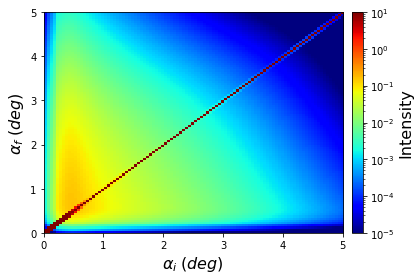

In [9]:
# %load offspec_ex.py
import numpy as np
import bornagain as ba
from bornagain import deg, angstrom, nm, kvector_t

def get_sample():
    # Defining Materials
    material_1 = ba.HomogeneousMaterial("Air", 0.0, 0.0)
    material_2 = ba.HomogeneousMaterial("Si", 7.6e-06, 1.7e-07)
    material_3 = ba.HomogeneousMaterial("Nb", 2.4e-05, 1.5e-06)

    # Defining Layers
    layer_1 = ba.Layer(material_1)
    layer_2 = ba.Layer(material_2, 3)
    layer_3 = ba.Layer(material_3, 5.8)
    layer_4 = ba.Layer(material_2)

    # Defining Roughness Parameters
    layerRoughness_1 = ba.LayerRoughness(0.46, 0.5, 10.0*nm)

    # Defining Multilayers
    multiLayer_1 = ba.MultiLayer()
    # uncomment the line below to add vertical cross correlation length
    # multiLayer_1.setCrossCorrLength(200)
    multiLayer_1.addLayer(layer_1)
    #=================================
    # put your code here 
    multiLayer_1.addLayer(layer_2)
    multiLayer_1.addLayer(layer_3)
    #==================================
    multiLayer_1.addLayerWithTopRoughness(layer_4, layerRoughness_1)
    return multiLayer_1


def get_simulation():
    simulation = ba.OffSpecSimulation()
    simulation.setDetectorParameters(10, -1.0*deg, 1.0*deg, 100, 0.0*deg, 5*deg)
    
    simulation.setDetectorResolutionFunction(ba.ResolutionFunction2DGaussian(0.005*deg, 0.005*deg))
    alpha_i_axis = ba.FixedBinAxis("alpha_i", 100, 0.0*deg, 5*deg)
    simulation.setBeamParameters(0.154*nm, alpha_i_axis, 0.0*deg)
    simulation.setBeamIntensity(1.0e+08)
    simulation.getOptions().setIncludeSpecular(True)
    return simulation


def run_simulation():
    sample = get_sample()
    simulation = get_simulation()
    simulation.setSample(sample)
    simulation.runSimulation()
    return simulation.result()


if __name__ == '__main__': 
    result = run_simulation()
    ba.plot_simulation_result(result, intensity_max=10.0)


## Solution

Run the line below to see the solution.

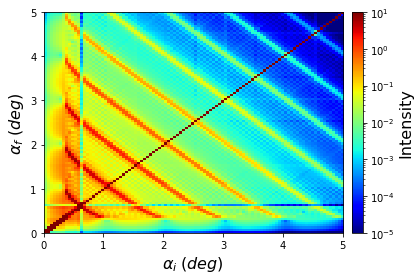

<Figure size 432x288 with 0 Axes>

In [12]:
%load offspec.py

## References

[[1]](https://www.springer.com/de/book/9783540885870) Daillant, J., Gibaud, A. (Eds.), X-ray and Neutron Reflectivity: Principles and Applications, Lect. Notes Phys. 770 (Springer, Berlin Heidelberg 2009), DOI 10.1007978-3-540-88588-7

[[2]](https://doi.org/10.1107/S0021889811002858) Ott, F. & Kozhevnikov, S. (2011). *J. Appl. Cryst.* **44**, 359-369.
